# Effect of parameter variation

Examines the effect of varying a range of parameters for three test samples and nine parameters.

The samples 18 (Escherichia coli), 85 (Klebsiella pneumoniae), 118 (Salmonella enterica) showed mediocre scores in the analysis using the default values and, thus, allowed for increased and decreased scores when varying the parameters.

We varied the parameters separately, one at a time as follows:
 - min_gene_density: 0.1, 0.2, 0.3 (default), 0.4, 0.5
 - min_seed_gene_density: 0.15, 0.3, 0.45 (default), 0.6, 0.75
 - min_length: 500, 1000, 1500 (default), 2000, 2500
 - max_length: 1250000, 1500000, 1750000 (default), 2000000, 2250000
 - min_read_depth: 0.1, 0.2, 0.3 (default\*), 0.4, 0.5
 - min_plasmid_read_depth: 0.2, 0.3, 0.4 (default\*\*), 0.5, 0.6
 - max_gc_diff: 0.05, 0.1, 0.15 (default), 0.2, 0.25
 - max_intermediate_contigs: 0, 1, 2 (default), 3, 4
 - max_intermediate_nt: 0, 1000, 2000 (default), 3000, 4000
  
\* The default min_read_depth was close to 0.3 on all three samples (18: 0.3; 85: 0.314417; 118: 0.308734).   
\*\* The default min_plasmid_read_depth was close to 0.4 on all three samples (18: 0.4; 85: 0.419223; 118: 0.411646).

*Observations:*   
In most cases, changes to the parameters had only small effects on the scores and the effects were rather continues (instead of jumping around), showing that the method is relatively stable in its parameters.
Some larger changes could be observed for, e.g., min_(seed_)gene_density and max_gc_diff.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_rows = None

In [3]:
def create_plot(full_df, name):
    columns = ['precision', 'recall', 'f1_score']
    column_labels = ['Precision', 'Recall', 'F1 score']

    fig, axes = plt.subplots(nrows = len(scores_df['param_key'].unique()), ncols = len(columns), figsize = (20,30), sharey = True)
    
    i = 0
    for param_key, key_grp in full_df.groupby(['param_key']):
        for sid, sid_grp in key_grp.groupby(['sid']):
            for j, col in enumerate(columns):
                axes[i][j].plot(sid_grp['param_value'], sid_grp[col], '-o', label = '%s' % sid)
                axes[i][j].set_xlabel(param_key, fontsize = 20)
                axes[i][j].xaxis.set_tick_params(labelsize = 15)
                axes[i][j].yaxis.set_tick_params(labelsize = 15)
        axes[i][0].set_ylabel('Score', fontsize = 20)                
        i += 1
    
    for j in range(0, len(column_labels)):
        axes[0][j].set_title(column_labels[j], fontsize = 20)
        
    fig.legend(['Sample 118', 'Sample 18', 'Sample 85'], loc = 'lower center', ncol = 3, fontsize = 20, bbox_to_anchor = (0.51, 0))
    
    plt.tight_layout()
    fig.subplots_adjust(bottom = 0.05)
    
    plt.savefig('%s.eps' % name, format = 'eps', dpi = 1200, bbox_inches = 'tight')
    plt.savefig('%s.pdf' % name, format = 'pdf', dpi = 1200, bbox_inches = 'tight')
    #plt.savefig('%s.png' % name, format = 'png', dpi = 1200, bbox_inches = 'tight')

## MOB-database

In [4]:
base_dir = 'samples_mob'
ids_file = 'ids.txt'
task_file = 'tasks.txt'

In [5]:
sample_ids = []
with open(ids_file, 'r') as in_file:
    for line in in_file:
        sample_ids.append(line.strip())
tasks = []
with open(task_file, 'r') as in_file:
    for line in in_file:
        tasks.append(line.strip().split('='))
tasks = pd.DataFrame(tasks, columns = ['param_key', 'param_value'])

In [6]:
contents = []
for sid in sample_ids:
    for i, row in tasks.iterrows():
        results_file = '%s/sample_%s/scoring_results_%s_%s.csv' % (base_dir, sid, row['param_key'], row['param_value'])
        with open(results_file, 'r') as in_file:
            contents.append([sid, row['param_key'], row['param_value']] + [float(val) for val in in_file.readline().strip().split(';')[2:]])
scores_df = pd.DataFrame(contents, columns = ['sid', 'param_key', 'param_value', 'recall', 'precision', 'f1_score'])

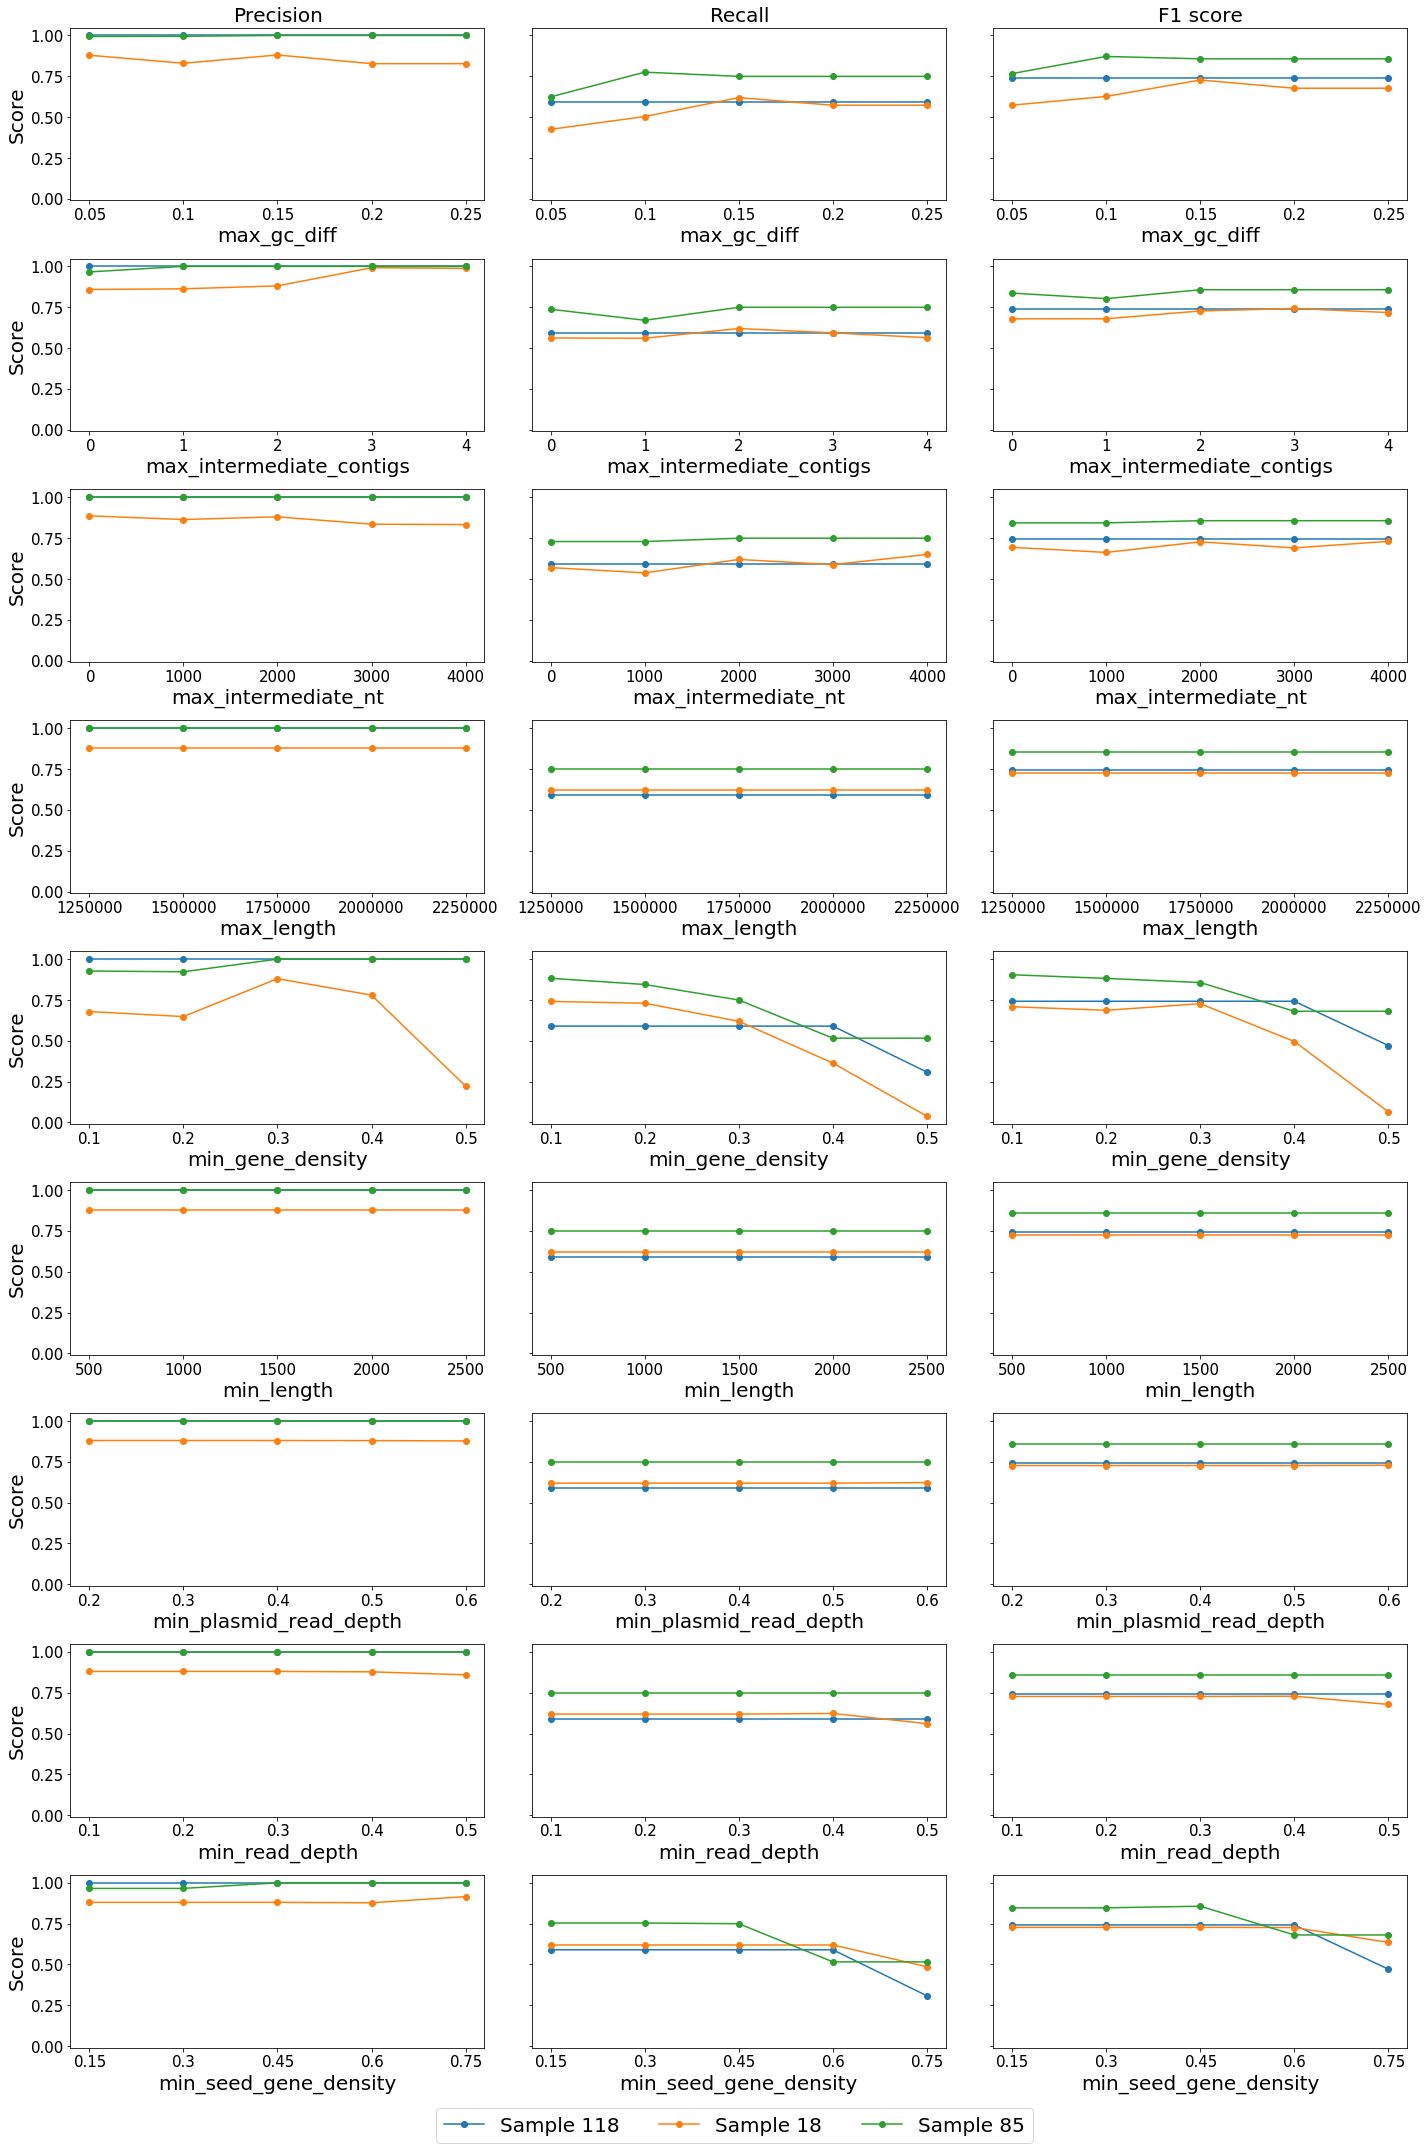

In [7]:
create_plot(scores_df, 'parameter_variation_mob')

## NCBI-database

In [8]:
base_dir = 'samples_ncbi'
ids_file = 'ids.txt'
task_file = 'tasks.txt'

In [9]:
sample_ids = []
with open(ids_file, 'r') as in_file:
    for line in in_file:
        sample_ids.append(line.strip())
tasks = []
with open(task_file, 'r') as in_file:
    for line in in_file:
        tasks.append(line.strip().split('='))
tasks = pd.DataFrame(tasks, columns = ['param_key', 'param_value'])

In [10]:
contents = []
for sid in sample_ids:
    for i, row in tasks.iterrows():
        results_file = '%s/sample_%s/scoring_results_%s_%s.csv' % (base_dir, sid, row['param_key'], row['param_value'])
        with open(results_file, 'r') as in_file:
            contents.append([sid, row['param_key'], row['param_value']] + [float(val) for val in in_file.readline().strip().split(';')[2:]])
scores_df = pd.DataFrame(contents, columns = ['sid', 'param_key', 'param_value', 'recall', 'precision', 'f1_score'])

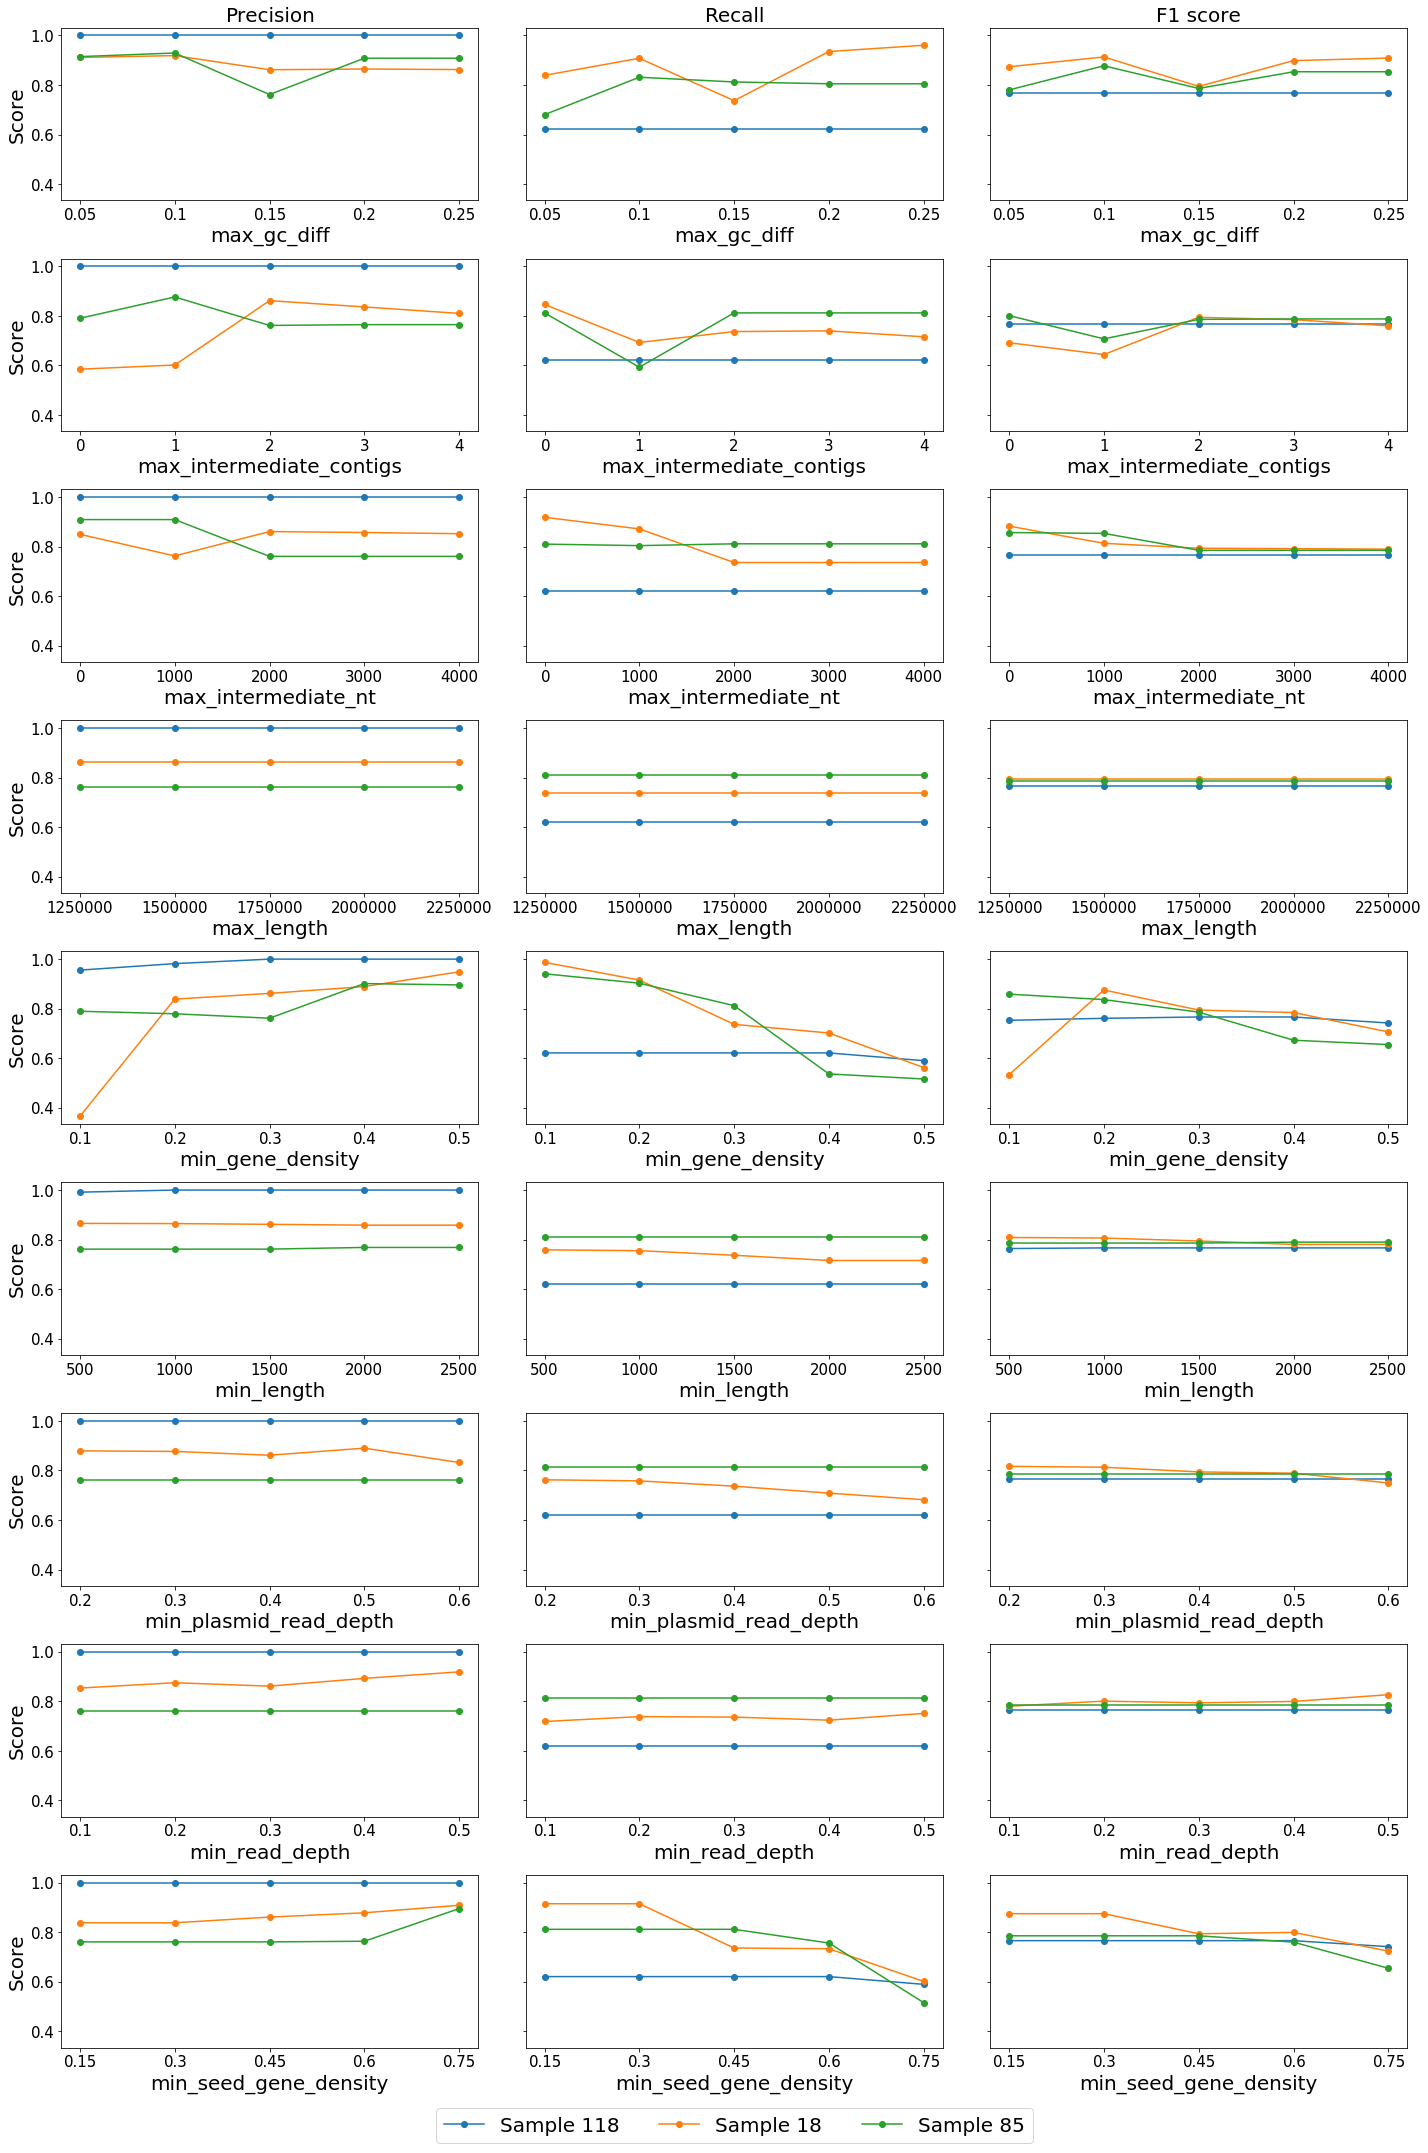

In [11]:
create_plot(scores_df, 'parameter_variation_ncbi')